In [25]:
from fipy import *



In [26]:
nx = ny = 20

mesh = Grid2D(nx=nx, ny=ny, dx=0.25, dy=0.25)
phi = CellVariable(name=r"$\phi$", mesh=mesh)
psi = CellVariable(name=r"$\psi$", mesh=mesh)



In [27]:
noise = GaussianNoiseVariable(mesh=mesh,mean=0.5,variance=0.01).value

In [28]:
phi[:] = noise

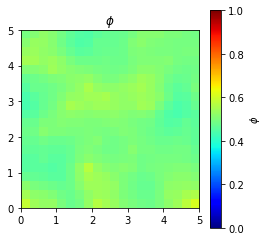

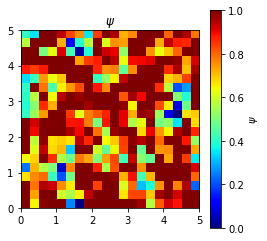

In [33]:
viewer = Viewer(vars=(phi, psi)) # , datamin=0., datamax=1.)


In [30]:
D = a = epsilon = 1.
dfdphi = a**2 * 2 * phi * (1 - phi) * (1 - 2 * phi)
dfdphi_ = a**2 * 2 * (1 - phi) * (1 - 2 * phi)
d2fdphi2 = a**2 * 2 * (1 - 6 * phi * (1 - phi))
eq1 = (TransientTerm(var=phi) == DiffusionTerm(coeff=D, var=psi))
eq2 = (ImplicitSourceTerm(coeff=1., var=psi) 
       == ImplicitSourceTerm(coeff=-d2fdphi2, var=phi) 
       - d2fdphi2 * phi + dfdphi - DiffusionTerm(coeff=epsilon**2, var=phi))
eq3 = (ImplicitSourceTerm(coeff=1., var=psi) 
        == ImplicitSourceTerm(coeff=dfdphi_, var=phi)
        - DiffusionTerm(coeff=epsilon**2, var=phi))
eq = eq1 & eq2

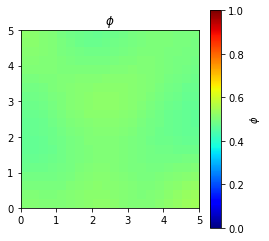

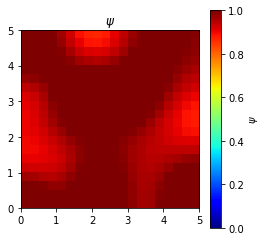

In [38]:
dexp = -5
elapsed = 0.

duration = .5e-1
dt = min(100, numerix.exp(dexp))
eq.solve(dt=dt)
elapsed += dt
dexp += 0.01
viewer = Viewer(vars=(phi, psi)) # , datamin=0., datamax=1.)
